# <span style="color:#1f77b4">**Data Analytics 01 - Data Ingest**</span>

This notebook pulls sample sales data into a Unity Catalog volume, loads it into Spark, and walks through a basic SQL-driven analysis with quick visual checks.


### Unity Catalog storage setup

Set the catalog/schema/volume for this project. Use an existing catalog, or create one in the UI if your metastore requires a managed location.


In [0]:
# Unity Catalog config for this project
dbutils.widgets.removeAll()
dbutils.widgets.text("CATALOG", "")
dbutils.widgets.text("SCHEMA", "default")
dbutils.widgets.text("VOLUME", "spark_lab")

catalog_widget = dbutils.widgets.get("CATALOG")
if catalog_widget:
    CATALOG = catalog_widget
else:
    # Prefer current catalog, otherwise pick the first non-system catalog
    current = spark.sql("SELECT current_catalog()").first()[0]
    catalogs = [r.catalog for r in spark.sql("SHOW CATALOGS").collect()]
    CATALOG = current if current not in ("system",) else next(c for c in catalogs if c not in ("system",))

SCHEMA = dbutils.widgets.get("SCHEMA")
VOLUME = dbutils.widgets.get("VOLUME")
BASE = f"dbfs:/Volumes/{CATALOG}/{SCHEMA}/{VOLUME}"


In [0]:
# Ensure schema and volume exist
spark.sql(f"CREATE SCHEMA IF NOT EXISTS {CATALOG}.{SCHEMA}")
spark.sql(f"CREATE VOLUME IF NOT EXISTS {CATALOG}.{SCHEMA}.{VOLUME}")


DataFrame[]

### <span style="color:#1f77b4">**Loading csv dataset into the Unity Catalog volume**</span>

Sync the raw CSV files into the Unity Catalog volume for this project.

- `dbutils.fs.mkdirs` creates the target directory.
- `dbutils.fs.cp` downloads the CSV files into the volume.


In [0]:
# Sync raw data files into the UC volume
sales_dir = f"{BASE}/sales"
dbutils.fs.rm(sales_dir, recurse=True)
dbutils.fs.mkdirs(sales_dir)
dbutils.fs.cp('https://raw.githubusercontent.com/Ch3rry-Pi3-Azure/DataBricks-Data-Analytics/refs/heads/main/data/2019.csv', f'{BASE}/sales/2019.csv')
dbutils.fs.cp('https://raw.githubusercontent.com/Ch3rry-Pi3-Azure/DataBricks-Data-Analytics/refs/heads/main/data/2020.csv', f'{BASE}/sales/2020.csv')
dbutils.fs.cp('https://raw.githubusercontent.com/Ch3rry-Pi3-Azure/DataBricks-Data-Analytics/refs/heads/main/data/2021.csv', f'{BASE}/sales/2021.csv')


True

### <span style="color:#1f77b4">**Loading csv files into a dataframe**</span>

Read the CSVs into a Spark DataFrame and preview the rows.

- `spark.read.load` reads files into a DataFrame.
- `display` renders a quick preview in Databricks.


In [0]:
# Load all CSVs into a Spark DataFrame
df = spark.read.load(BASE + "/sales/*.csv", format='csv')
display(df.limit(100))

_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8
SO49171,1,2021-01-01,Mariah Foster,mariah21@adventure-works.com,"Road-250 Black, 48",1,2181.5625,174.525
SO49172,1,2021-01-01,Brian Howard,brian23@adventure-works.com,"Road-250 Red, 44",1,2443.35,195.468
SO49173,1,2021-01-01,Linda Alvarez,linda19@adventure-works.com,"Mountain-200 Silver, 38",1,2071.4196,165.7136
SO49174,1,2021-01-01,Gina Hernandez,gina4@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4196,165.7136
SO49178,1,2021-01-01,Beth Ruiz,beth4@adventure-works.com,"Road-550-W Yellow, 44",1,1000.4375,80.035
SO49179,1,2021-01-01,Evan Ward,evan13@adventure-works.com,"Road-550-W Yellow, 38",1,1000.4375,80.035
SO49175,1,2021-01-01,Margaret Guo,margaret24@adventure-works.com,"Road-250 Red, 52",1,2443.35,195.468
SO49180,1,2021-01-01,Mitchell Yuan,mitchell6@adventure-works.com,"Road-650 Black, 58",1,782.99,62.6392
SO49176,1,2021-01-01,Shawn Sharma,shawn11@adventure-works.com,"Mountain-200 Silver, 46",1,2071.4196,165.7136
SO49177,1,2021-01-01,Barbara Chande,barbara44@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4196,165.7136


### <span style="color:#1f77b4">**Defining Schema for the dataframe**</span>

Apply an explicit schema so dates, numbers, and strings parse consistently.

- `StructType` defines the full schema structure.
- `StructField` defines each column name, type, and nullability.


In [0]:
# Define an explicit schema for consistent types
from pyspark.sql.types import *
from pyspark.sql.functions import *
orderSchema = StructType([
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
])
df = spark.read.load(BASE + "/sales/*.csv", format='csv', schema=orderSchema)
display(df.limit(100))

SalesOrderNumber,SalesOrderLineNumber,OrderDate,CustomerName,Email,Item,Quantity,UnitPrice,Tax
SO49171,1,2021-01-01,Mariah Foster,mariah21@adventure-works.com,"Road-250 Black, 48",1,2181.5625,174.525
SO49172,1,2021-01-01,Brian Howard,brian23@adventure-works.com,"Road-250 Red, 44",1,2443.35,195.468
SO49173,1,2021-01-01,Linda Alvarez,linda19@adventure-works.com,"Mountain-200 Silver, 38",1,2071.4197,165.7136
SO49174,1,2021-01-01,Gina Hernandez,gina4@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4197,165.7136
SO49178,1,2021-01-01,Beth Ruiz,beth4@adventure-works.com,"Road-550-W Yellow, 44",1,1000.4375,80.035
SO49179,1,2021-01-01,Evan Ward,evan13@adventure-works.com,"Road-550-W Yellow, 38",1,1000.4375,80.035
SO49175,1,2021-01-01,Margaret Guo,margaret24@adventure-works.com,"Road-250 Red, 52",1,2443.35,195.468
SO49180,1,2021-01-01,Mitchell Yuan,mitchell6@adventure-works.com,"Road-650 Black, 58",1,782.99,62.6392
SO49176,1,2021-01-01,Shawn Sharma,shawn11@adventure-works.com,"Mountain-200 Silver, 46",1,2071.4197,165.7136
SO49177,1,2021-01-01,Barbara Chande,barbara44@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4197,165.7136


### <span style="color:#1f77b4">**Query Data using Spark SQL**</span>

Register a temp view and run SQL to explore and aggregate the data.

- `createOrReplaceTempView` exposes the DataFrame as a SQL view.
- `spark.sql` runs SQL over Spark data.


In [0]:
# Register a temp view and query with Spark SQL
df.createOrReplaceTempView("salesorders")
spark_df = spark.sql("SELECT * FROM salesorders")
display(spark_df)

SalesOrderNumber,SalesOrderLineNumber,OrderDate,CustomerName,Email,Item,Quantity,UnitPrice,Tax
SO49171,1,2021-01-01,Mariah Foster,mariah21@adventure-works.com,"Road-250 Black, 48",1,2181.5625,174.525
SO49172,1,2021-01-01,Brian Howard,brian23@adventure-works.com,"Road-250 Red, 44",1,2443.35,195.468
SO49173,1,2021-01-01,Linda Alvarez,linda19@adventure-works.com,"Mountain-200 Silver, 38",1,2071.4197,165.7136
SO49174,1,2021-01-01,Gina Hernandez,gina4@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4197,165.7136
SO49178,1,2021-01-01,Beth Ruiz,beth4@adventure-works.com,"Road-550-W Yellow, 44",1,1000.4375,80.035
SO49179,1,2021-01-01,Evan Ward,evan13@adventure-works.com,"Road-550-W Yellow, 38",1,1000.4375,80.035
SO49175,1,2021-01-01,Margaret Guo,margaret24@adventure-works.com,"Road-250 Red, 52",1,2443.35,195.468
SO49180,1,2021-01-01,Mitchell Yuan,mitchell6@adventure-works.com,"Road-650 Black, 58",1,782.99,62.6392
SO49176,1,2021-01-01,Shawn Sharma,shawn11@adventure-works.com,"Mountain-200 Silver, 46",1,2071.4197,165.7136
SO49177,1,2021-01-01,Barbara Chande,barbara44@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4197,165.7136


In [0]:
# Aggregate gross revenue by year
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
               SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
        FROM salesorders \
        GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
        ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



### <span style="color:#1f77b4">**Using Matplotlib for visualisation**</span>

Convert to Pandas and plot revenue by year for a quick sanity check.

- `toPandas` collects results to the driver for plotting.
- `plt.bar` creates the bar chart.


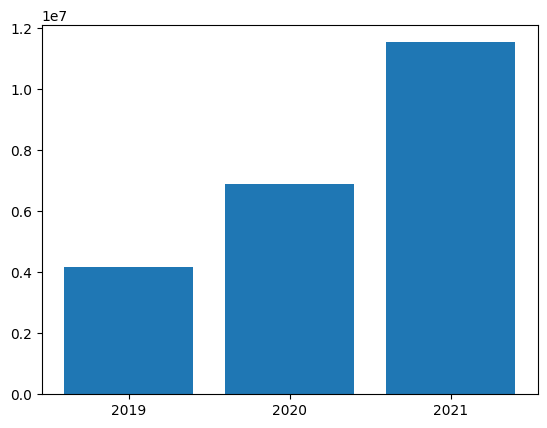

In [0]:
# Convert to Pandas for local plotting
from matplotlib import pyplot as plt

# matplotlib requires a Pandas dataframe, not a Spark one
df_sales = df_spark.toPandas()
# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])
# Display the plot
plt.show()

### <span style="color:#1f77b4">**Using Seaborn Library**</span>

Recreate the chart with Seaborn for a cleaner, styled visual.

- `sns.barplot` builds a categorical bar chart with styling.
- `plt.show` renders the chart output.


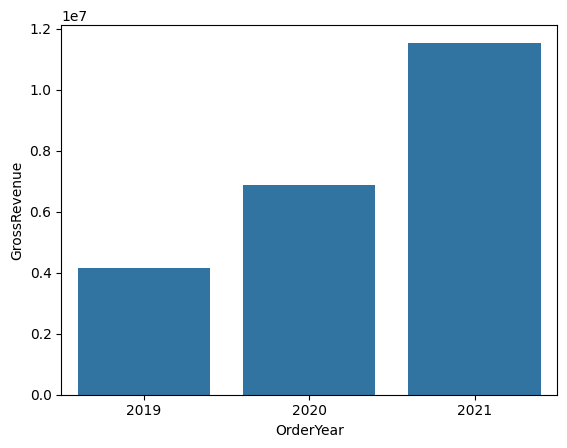

In [0]:
# Use Seaborn for a styled bar chart
import seaborn as sns

# Clear the plot area
plt.clf()
# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()